<a href="https://colab.research.google.com/github/Vamsi24-coder/Predictive_Analytics/blob/main/Student_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

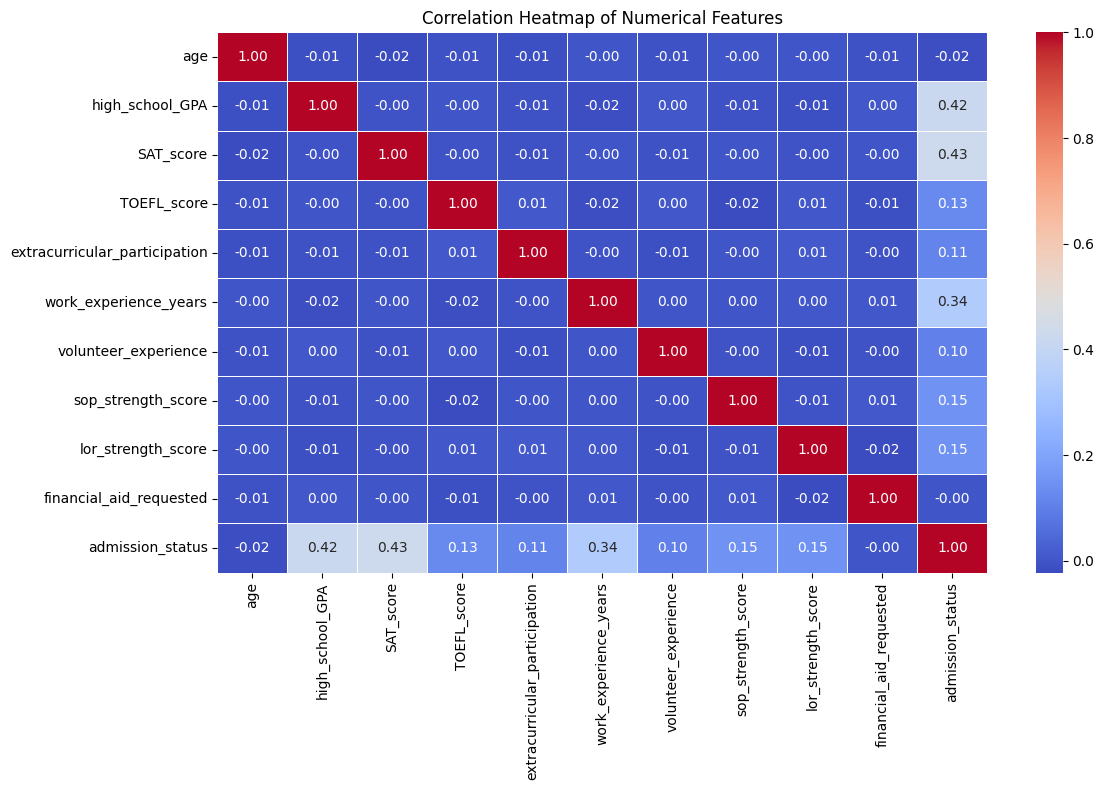

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path if needed)
df = pd.read_csv('student_admission_dataset.csv')

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-3390510703.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='admission_status', y='high_school_GPA', palette='Set2')


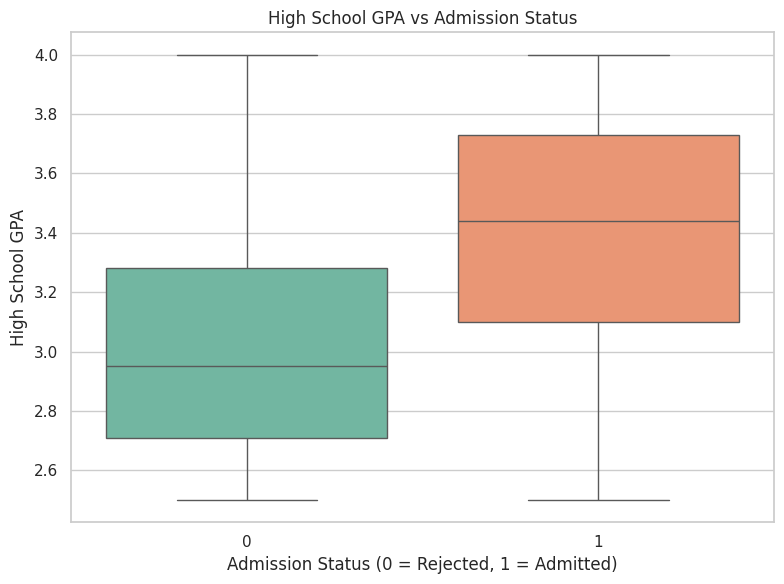

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('student_admission_dataset.csv')

# Set plot style
sns.set(style='whitegrid')

# Plot: GPA vs Admission Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='admission_status', y='high_school_GPA', palette='Set2')
plt.title('High School GPA vs Admission Status')
plt.xlabel('Admission Status (0 = Rejected, 1 = Admitted)')
plt.ylabel('High School GPA')
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-1667568869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='admission_status', y='sop_strength_score', palette='Set3')


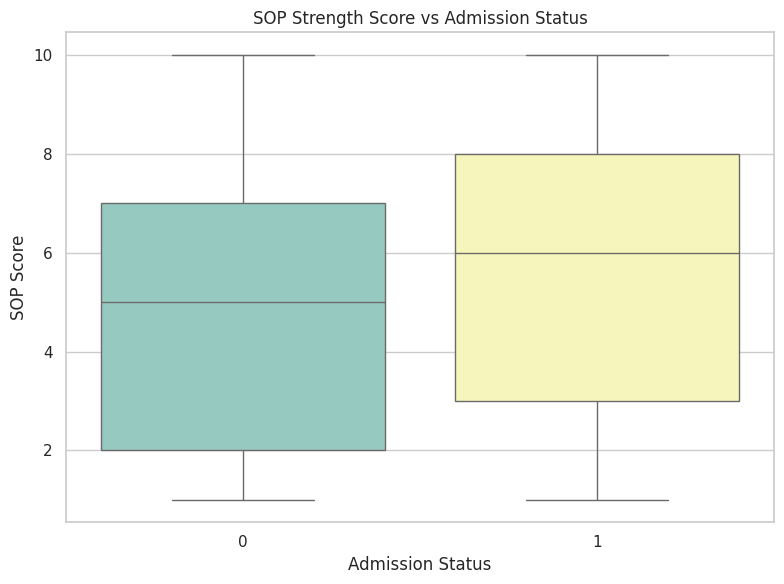

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='admission_status', y='sop_strength_score', palette='Set3')
plt.title('SOP Strength Score vs Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('SOP Score')
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-3488203314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='admission_status', y='SAT_score', palette='coolwarm')


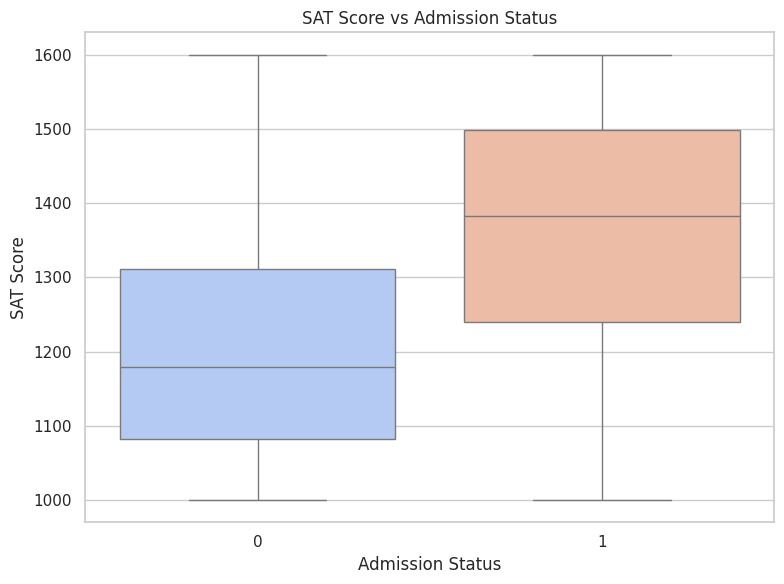

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='admission_status', y='SAT_score', palette='coolwarm')
plt.title('SAT Score vs Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('SAT Score')
plt.tight_layout()
plt.show()


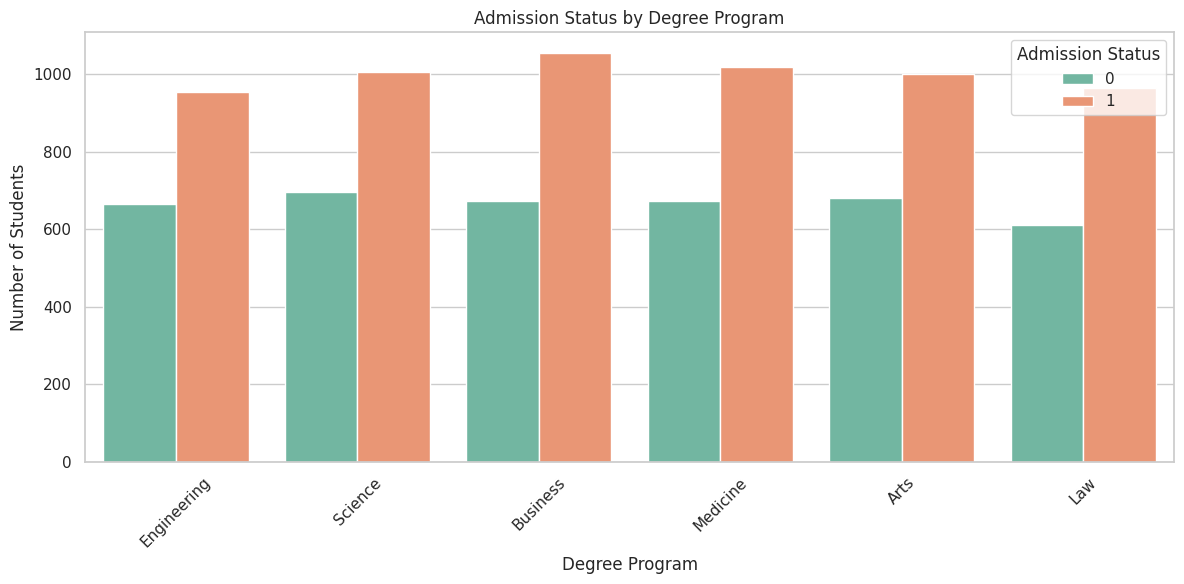

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('student_admission_dataset.csv')

# Plot: Degree Program vs Admission Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='degree_program', hue='admission_status', palette='Set2')
plt.title('Admission Status by Degree Program')
plt.xlabel('Degree Program')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Admission Status')
plt.tight_layout()
plt.show()


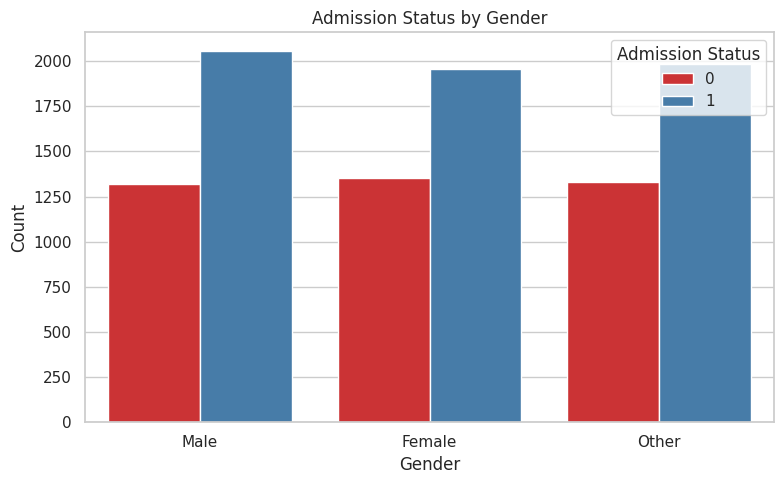

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='admission_status', palette='Set1')
plt.title('Admission Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.tight_layout()
plt.show()


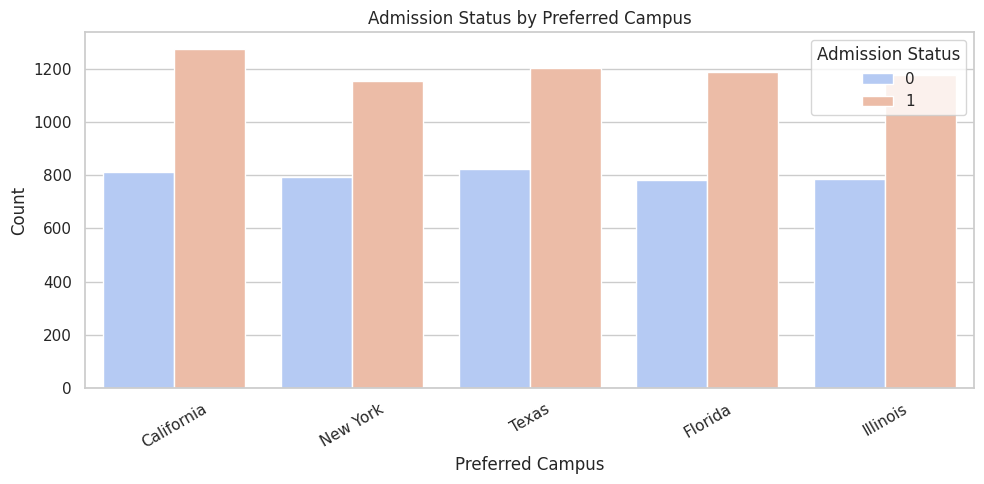

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='preferred_campus', hue='admission_status', palette='coolwarm')
plt.title('Admission Status by Preferred Campus')
plt.xlabel('Preferred Campus')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


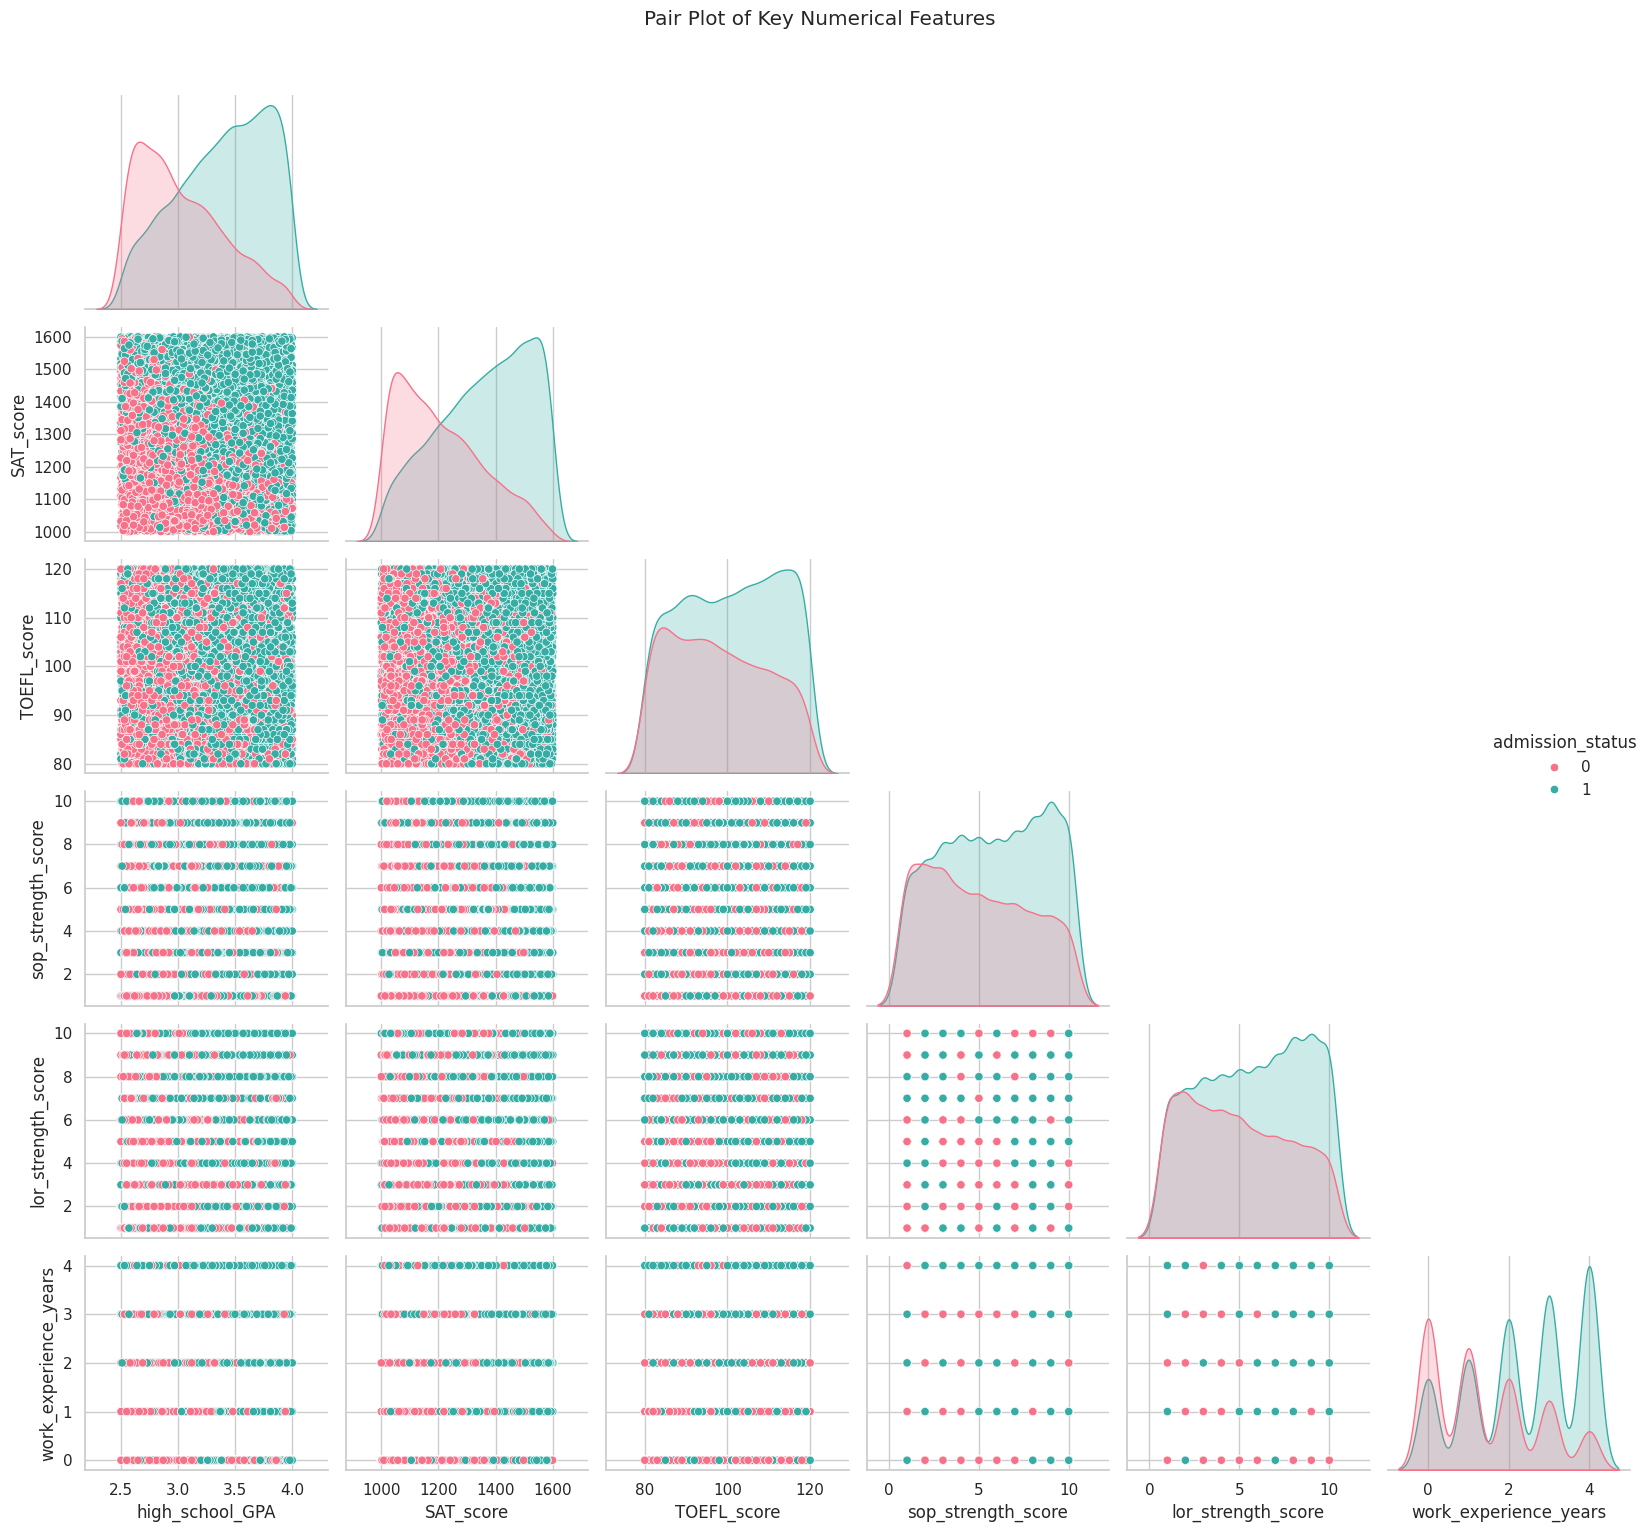

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('student_admission_dataset.csv')

# Select important numerical features for the pair plot
selected_features = [
    'high_school_GPA',
    'SAT_score',
    'TOEFL_score',
    'sop_strength_score',
    'lor_strength_score',
    'work_experience_years',
    'admission_status'  # Target variable for hue
]

# Subset the data
pair_df = df[selected_features]

# Create pair plot
sns.pairplot(pair_df, hue='admission_status', diag_kind='kde', corner=True, palette='husl')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.tight_layout()
plt.show()


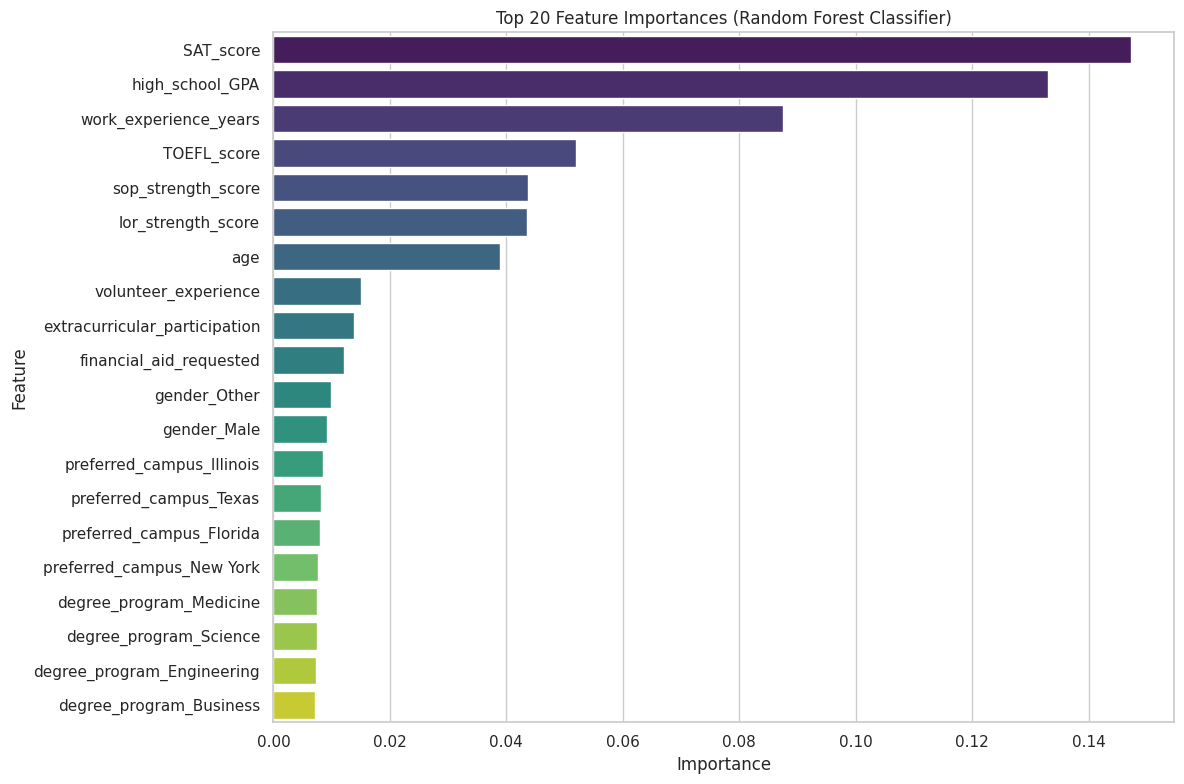

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('student_admission_dataset.csv')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop rows with missing target
df_encoded = df_encoded.dropna(subset=['admission_status'])

# Separate features and target
X = df_encoded.drop('admission_status', axis=1)
y = df_encoded['admission_status']

# Replace inf/-inf with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Impute missing values (mean for numeric, handles NaNs)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest Classifier)')
plt.tight_layout()
plt.show()
